In [1]:
#PLOT DRIFTLINES FOR z=0.09 to z=2.0 10ns (CR)

In [2]:
#INITIALIZION
#Kernel: PYRoot
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pylab

from scipy.optimize import curve_fit
from scipy.misc import factorial
from __future__ import division
import pylab as plb
from scipy import asarray as ar,exp
from scipy.special import erf

import matplotlib as mpl
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict

%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

print("\nStarting notebook....")

Populating the interactive namespace from numpy and matplotlib

Starting notebook....


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#
def Get_i_line_from_file(filename, i):
    file = open(filename, 'r')
    lines = file.readlines()
    a = lines[i].split('\t\t')
    DriftTime_us= float(a[2])
    r_cm = float(a[3])
    z_cm = float(a[4])
    return r_cm, z_cm, DriftTime_us

In [4]:
#Import single drift line
folder = '/data/rossiter/lz/BottomGridAnalysis_200513/'
inpath = folder+'CR_SingleDriftLineCalc_TimeStep_0.01us_r10.55cm_z00.09cm_1116.txt'
rIN_cm = []
zIN_cm = []
DT_IN_us=[]
rOUT_cm= []
zOUT_cm= []

for line in open(inpath):
    if line.startswith('#'):
        continue
    if line.startswith('*'):
        continue
    else:
        data = line.split('\t\t')
        rIN_cm.append(float(data[0]))
        zIN_cm.append(float(data[1]))
        DT_IN_us.append(float(data[2]))
        rOUT_cm.append(float(data[3]))
        zOUT_cm.append(float(data[4]))

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]), <a list of 11 Text yticklabel objects>)

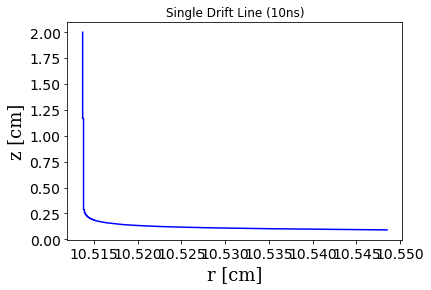

In [5]:
plt.figure(1)
x = rOUT_cm
y = zOUT_cm
plt.plot(x,y,'blue')

plt.title("Single Drift Line (10ns)")
plt.xlabel('r [cm]',fontsize=18,family='serif')
plt.ylabel('z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.xlim([.001,.0045])
#plt.ylim([145,146.2])  

In [6]:
print len(rIN_cm)
print "rIN\t\trOUT\t\tzIN\t\tzOUT"
print str(rIN_cm[len(rIN_cm)-1])+"\t\t"+str(rOUT_cm[len(rIN_cm)-1])+"\t\t"+str(zIN_cm[len(rIN_cm)-1])+"\t\t"+str(zOUT_cm[len(rIN_cm)-1])

r_true=rIN_cm[len(rIN_cm)-1]
r_S2=rOUT_cm[len(rIN_cm)-1]
DriftTime=DT_IN_us[len(rIN_cm)-1]
dR=r_true-r_S2

print r_true
print r_S2

print "r_true\t\tr_true-rS2"
print str(r_true)+"\t\t"+str(dR)

1054
rIN		rOUT		zIN		zOUT
10.55		10.5137		0.09		2.0
10.55
10.5137
r_true		r_true-rS2
10.55		0.0363


In [7]:
#Import Field Strength
inpath = '/home/rossiter/XYZPositionCorrector/cathoderegion_100kv_100.txt'
FIELD_z_cm = []
FIELD_r_cm = []
FIELD_U_V=[]
FIELD_E_Vpm= []
FIELD_Ez_Vpm= []
FIELD_Er_Vpm= []

for line in open(inpath):
    if line.startswith('#'):
        continue
    if line.startswith('*'):
        continue
    else:
        data = line.split(',\t\t')
        FIELD_z_cm.append(-1*float(data[0]))
        FIELD_r_cm.append(float(data[1]))
        FIELD_U_V.append(float(data[2]))
        FIELD_E_Vpm.append(float(data[3])/10.) #Make it V/cm
        FIELD_Ez_Vpm.append(float(data[4]))
        FIELD_Er_Vpm.append(float(data[5]))

print "\t\t...Done!"

		...Done!


In [8]:
print FIELD_E_Vpm[10]

6460.94


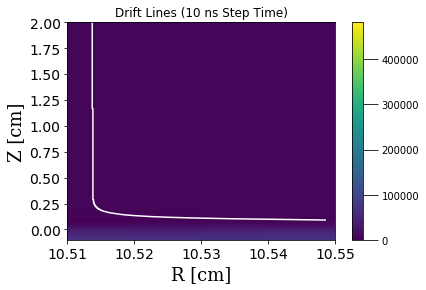

In [9]:
# Single Drift line - Grid region with field strength


figure(1)
plt.xlim([10.51,10.55])
plt.ylim([-.1,2.0])


inpath = folder+'CR_SingleDriftLineCalc_TimeStep_0.01us_r10.55cm_z00.09cm_1116.txt' 
rIN_cm = []
zIN_cm = []
DT_IN_us = []
rOUT_cm = []
zOUT_cm = []   
for line in open(inpath):
    #print file
    if line.startswith('#'):
        continue
    if line.startswith('*'):
        continue
    else:
        data = line.split('		')
        #print data[0]
        rIN_cm.append(float(data[0]))
        zIN_cm.append(float(data[1]))
        DT_IN_us.append(float(data[2]))
        rOUT_cm.append(float(data[3]))
        zOUT_cm.append(float(data[4]))
    
x = rOUT_cm
y = zOUT_cm
plt.plot(x,y,'white')


x_FIELD = FIELD_r_cm
y_FIELD = FIELD_z_cm
z_FIELD = FIELD_E_Vpm

plt.title('Drift Lines (10 ns Step Time)')
plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


x_ARRAY = np.asarray(x_FIELD)
y_ARRAY = np.asarray(y_FIELD)
z_ARRAY = np.asarray(z_FIELD)

shape = np.unique(x_ARRAY).shape[0],np.unique(y_ARRAY).shape[0]
x_arr = x_ARRAY.reshape(shape)
y_arr = y_ARRAY.reshape(shape)
z_arr = z_ARRAY.reshape(shape)
plt.rcParams['image.cmap'] = 'viridis'

plt.pcolormesh(x_arr,y_arr,z_arr)
cbar = plt.colorbar()                                                                         
cbar.ax.tick_params(size=15)         


In [10]:
#Import all drift lines from filelist
in_filelist_path = 'Driftlines_10ns_1116_CR_filelist.txt'

filelist = []
for f in open(in_filelist_path):
    file = f.split('\n')[0]
    filelist.append(file)

print len(filelist)
print('\t\t...Done!')

121
		...Done!


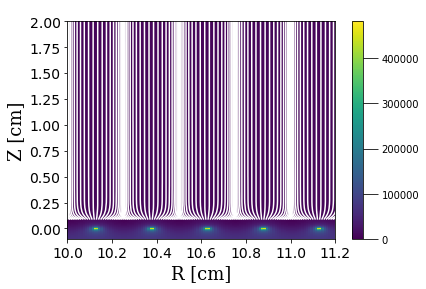

In [11]:
# All lines - Grid region with TOTAL field strength
#print len(filelist)
#print filelist[0]

#folder = '/project/projectdirs/lz/users/rossiter/DriftAnalysis_181111/data/Driftlines_10ns_1116_CR/'

figure(1)
for file in filelist:
    inpath=folder+str(file) 
    rIN_cm = []
    zIN_cm = []
    DT_IN_us = []
    rOUT_cm = []
    zOUT_cm = []   
    for line in open(inpath):
        #print file
        if line.startswith('#'):
            continue
        if line.startswith('*'):
            continue
        else:
            data = line.split('		')
            #print data[0]
            rIN_cm.append(float(data[0]))
            zIN_cm.append(float(data[1]))
            DT_IN_us.append(float(data[2]))
            rOUT_cm.append(float(data[3]))
            zOUT_cm.append(float(data[4]))
    
    x = rOUT_cm
    y = zOUT_cm
    plt.plot(x,y,'white')


x_FIELD = FIELD_r_cm
y_FIELD = FIELD_z_cm
z_FIELD = FIELD_E_Vpm

#plt.title('Drift Lines (10 ns Step Time)')
plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,1])
plt.ylim([145,146.2])

x_ARRAY = np.asarray(x_FIELD)
y_ARRAY = np.asarray(y_FIELD)
z_ARRAY = np.asarray(z_FIELD)

shape = np.unique(x_ARRAY).shape[0],np.unique(y_ARRAY).shape[0]
x_arr = x_ARRAY.reshape(shape)
y_arr = y_ARRAY.reshape(shape)
z_arr = z_ARRAY.reshape(shape)
plt.rcParams['image.cmap'] = 'viridis'
plt.xlim([10,11.2])
plt.ylim([-.1,2.])
plt.pcolormesh(x_arr,y_arr,z_arr)

cbar = plt.colorbar()
                                                                          
cbar.ax.tick_params(size=15)         


121
CR_SingleDriftLineCalc_TimeStep_0.01us_r10.01cm_z00.09cm_1116.txt


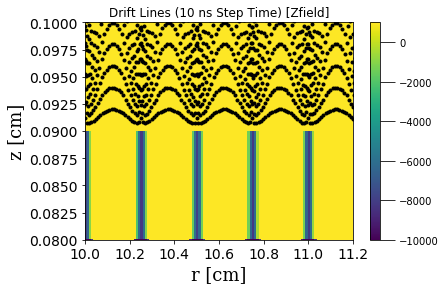

In [12]:
# All lines - Grid region with z field strength
print len(filelist)
print filelist[0]

figure(1)
for file in filelist:
    inpath=folder+str(file) 
    rIN_cm = []
    zIN_cm = []
    DT_IN_us = []
    rOUT_cm = []
    zOUT_cm = []   
    for line in open(inpath):
        #print file
        if line.startswith('#'):
            continue
        if line.startswith('*'):
            continue
        else:
            data = line.split('		')
            #print data[0]
            rIN_cm.append(float(data[0]))
            zIN_cm.append(float(data[1]))
            DT_IN_us.append(float(data[2]))
            rOUT_cm.append(float(data[3]))
            zOUT_cm.append(float(data[4]))
    
    x = rOUT_cm
    y = zOUT_cm
    plt.plot(x,y,'.',c='black')


x_FIELD = FIELD_r_cm
y_FIELD = FIELD_z_cm
z_FIELD = FIELD_Ez_Vpm

plt.title('Drift Lines (10 ns Step Time) [Zfield]')
plt.xlabel('r [cm]',fontsize=18,family='serif')
plt.ylabel('z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,1])
plt.ylim([145,146.2])

x_ARRAY = np.asarray(x_FIELD)
y_ARRAY = np.asarray(y_FIELD)
z_ARRAY = np.asarray(z_FIELD)

shape = np.unique(x_ARRAY).shape[0],np.unique(y_ARRAY).shape[0]
x_arr = x_ARRAY.reshape(shape)
y_arr = y_ARRAY.reshape(shape)
z_arr = z_ARRAY.reshape(shape)
plt.rcParams['image.cmap'] = 'viridis'
plt.xlim([10,11.2])
plt.ylim([0.08,.1])

plt.pcolormesh(x_arr,y_arr,z_arr)
cbar = plt.colorbar()                                                                       
cbar.ax.tick_params(size=15)    
plt.clim(-10000,1000)


121
CR_SingleDriftLineCalc_TimeStep_0.01us_r10.01cm_z00.09cm_1116.txt


(-0.1, 2.0)

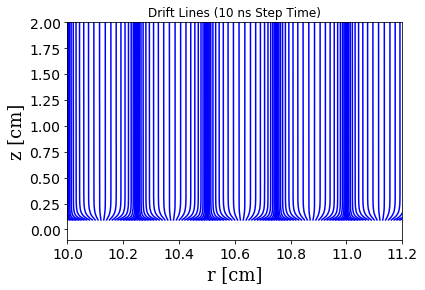

In [13]:
print len(filelist)
print filelist[0]

rTRUE_list=[]
dR_list=[]
DT_list=[]

#folder = '/project/projectdirs/lz/users/rossiter/DriftAnalysis_181111/data/Driftlines_10ns_1116_CR/'

figure(1)
for file in filelist:
    inpath=folder+str(file) 
    rIN_cm = []
    zIN_cm = []
    DT_IN_us = []
    rOUT_cm = []
    zOUT_cm = []   
    for line in open(inpath):
        #print file
        if line.startswith('#'):
            continue
        if line.startswith('*'):
            continue
        else:
            data = line.split('		')
            #print data[0]
            rIN_cm.append(float(data[0]))
            zIN_cm.append(float(data[1]))
            DT_IN_us.append(float(data[2]))
            rOUT_cm.append(float(data[3]))
            zOUT_cm.append(float(data[4]))
            
    r_true=rIN_cm[len(rIN_cm)-1]
    r_S2=rOUT_cm[len(rIN_cm)-1]
    DriftTime=DT_IN_us[len(rIN_cm)-1]
    dR=rIN_cm[len(rIN_cm)-1] - rOUT_cm[len(rIN_cm)-1]
    #print str(r_true)+"\t\t"+str(dR)
    #print str(rIN_cm[len(rIN_cm)-1])+"\t\t"+str(rOUT_cm[len(rIN_cm)-1])+"\t\t"+str(zIN_cm[len(rIN_cm)-1])+"\t\t"+str(zOUT_cm[len(rIN_cm)-1])+"\t\t"+str(dR)
    rTRUE_list.append(rIN_cm[len(rIN_cm)-1])
    dR_list.append(dR)
    DT_list.append(DriftTime)
    x = rOUT_cm
    y = zOUT_cm
    plt.plot(x,y,'blue')


plt.title('Drift Lines (10 ns Step Time)')
plt.xlabel('r [cm]',fontsize=18,family='serif')
plt.ylabel('z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([10,11.2])
plt.ylim([-.1,2.])         


In [14]:
#Get all txt files in directory
#dir_2 = "/data/rossiter/lz/TopGridAnalysis_Dense_200508/"
file_list_Dense=[]
for file in os.listdir(folder):
    if file.endswith(".txt"):
        #print(os.path.join(file))
        file_list_Dense.append(folder+os.path.join(file))

print "len(file_list): "+str(len(file_list_Dense))

len(file_list): 126


In [15]:
r_hist_list =[]

for i in range(0, len(file_list_Dense)):
    r_cm, z_cm, DriftTime_us = Get_i_line_from_file(file_list_Dense[i], -1)
    #print str(r_cm)+"\t"+str(z_cm)
    r_hist_list.append(r_cm)
    #if i > 500:
    #    print file_list_Dense[i]
    
    
print len(r_hist_list)

126


(101,)
[ 9.99907   10.0139363 10.0288026 10.0436689 10.0585352 10.0734015
 10.0882678 10.1031341 10.1180004 10.1328667 10.147733  10.1625993
 10.1774656 10.1923319 10.2071982 10.2220645 10.2369308 10.2517971
 10.2666634 10.2815297 10.296396  10.3112623 10.3261286 10.3409949
 10.3558612 10.3707275 10.3855938 10.4004601 10.4153264 10.4301927
 10.445059  10.4599253 10.4747916 10.4896579 10.5045242 10.5193905
 10.5342568 10.5491231 10.5639894 10.5788557 10.593722  10.6085883
 10.6234546 10.6383209 10.6531872 10.6680535 10.6829198 10.6977861
 10.7126524 10.7275187 10.742385  10.7572513 10.7721176 10.7869839
 10.8018502 10.8167165 10.8315828 10.8464491 10.8613154 10.8761817
 10.891048  10.9059143 10.9207806 10.9356469 10.9505132 10.9653795
 10.9802458 10.9951121 11.0099784 11.0248447 11.039711  11.0545773
 11.0694436 11.0843099 11.0991762 11.1140425 11.1289088 11.1437751
 11.1586414 11.1735077 11.188374  11.2032403 11.2181066 11.2329729
 11.2478392 11.2627055 11.2775718 11.2924381 11.3073044

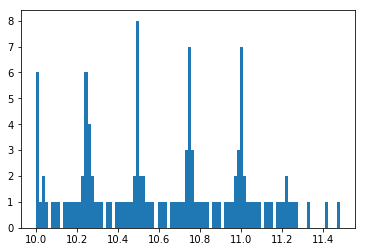

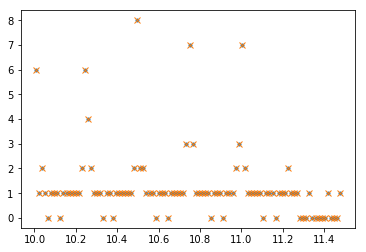

In [16]:
#Inspect initial histogram
num_bins =  100
#(full_n, full_bins, full_patches) = plt.hist(Full_Reduced_R_list, bins=num_bins)
figure(1)
(n_R, bins, patches) = plt.hist(r_hist_list, bins=num_bins)

#Get bin mids
print bins.shape
print bins

R_bin_mids_list = []
for i in range(1, len(bins)):
    R_bin_mids_list.append( (bins[i] + bins[i-1])/2 )
    
this_half_bid_width = .5*(R_bin_mids_list[1] - R_bin_mids_list[0])

#print bin_mids_list[-1]
#print bin_mids_list[-1]+this_half_bid_width
#print bin_mids_list[-1]-this_half_bid_width


#Remove bins with n<threshold, & remove top bin
threshold=0
print n_R.shape
print n_R
print "\n"

counter = 0
new_bin_mids_list = []
new_n_list = []
for i in range(0, len(n_R)):
    if n_R[i] < threshold:# or n_R[i] > 15000:
        #print( str(i)+": ("+str(bin_mids_list[i])+", "+str(n[i])+")" )
        counter +=1
    else:
        new_bin_mids_list.append(R_bin_mids_list[i])
        new_n_list.append(n_R[i])

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

print("\n\tcount = "+str(counter)+" / "+str(len(n_R)))


#Inspect bins
print "bin_mids\t bin_count"
for i in range(0,len(R_bin_mids_list)):
    print str(R_bin_mids_list[i])+"\t"+str(n_R[i])
    


#Inspect bins
print "\n-------\nNEW BINS"
print "bin_mids\t bin_count"
for i in range(0,len(new_bin_mids_list)):
    print str(new_bin_mids_list[i])+"\t"+str(new_n_list[i])

#Inspect elements with n>10
figure(2)
plt.plot(R_bin_mids_list, n_R, ".")
plt.plot(new_bin_mids_list,  new_n_list, 'x')

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text yticklabel objects>)

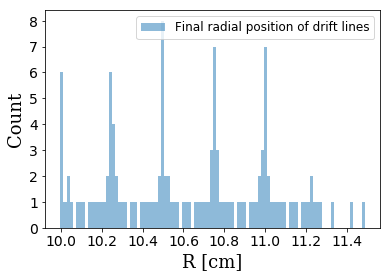

In [17]:
#R plot
#num_bins=100
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

ax.hist(r_hist_list, bins=num_bins, alpha=0.5, label='Final radial position of drift lines')
#ax.plot(R_bin_mids_list, n_R, ".b", markersize='10')
#ax.errorbar(R_bin_mids_list, np.asarray(n_R), pow(np.asarray(n_R),.5), ecolor='blue', capsize=3, fmt=' ')
pylab.legend(loc='best', fontsize=12)
#ax.set_yscale('log')

#plt.xlim(0.85, 1.15)


plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

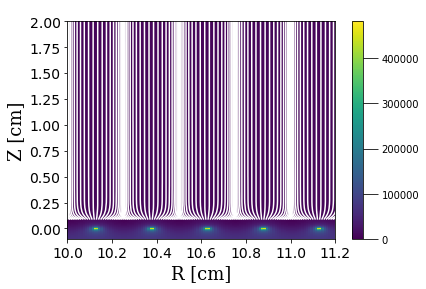

In [18]:
#
# All lines - Grid region with TOTAL field strength
#print len(filelist)
#print filelist[0]

#folder = '/project/projectdirs/lz/users/rossiter/DriftAnalysis_181111/data/Driftlines_10ns_1116_CR/'

figure(1)
for file in filelist:
    inpath=folder+str(file) 
    rIN_cm = []
    zIN_cm = []
    DT_IN_us = []
    rOUT_cm = []
    zOUT_cm = []   
    for line in open(inpath):
        #print file
        if line.startswith('#'):
            continue
        if line.startswith('*'):
            continue
        else:
            data = line.split('		')
            #print data[0]
            rIN_cm.append(float(data[0]))
            zIN_cm.append(float(data[1]))
            DT_IN_us.append(float(data[2]))
            rOUT_cm.append(float(data[3]))
            zOUT_cm.append(float(data[4]))
    
    x = rOUT_cm
    y = zOUT_cm
    plt.plot(x,y,'white')


x_FIELD = FIELD_r_cm
y_FIELD = FIELD_z_cm
z_FIELD = FIELD_E_Vpm

#plt.title('Drift Lines (10 ns Step Time)')
plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,1])
plt.ylim([145,146.2])

x_ARRAY = np.asarray(x_FIELD)
y_ARRAY = np.asarray(y_FIELD)
z_ARRAY = np.asarray(z_FIELD)

shape = np.unique(x_ARRAY).shape[0],np.unique(y_ARRAY).shape[0]
x_arr = x_ARRAY.reshape(shape)
y_arr = y_ARRAY.reshape(shape)
z_arr = z_ARRAY.reshape(shape)
plt.rcParams['image.cmap'] = 'viridis'
plt.xlim([10,11.2])
plt.ylim([-.1,2.])
plt.pcolormesh(x_arr,y_arr,z_arr)

cbar = plt.colorbar()
                                                                          
cbar.ax.tick_params(size=15)         



Populating the interactive namespace from numpy and matplotlib


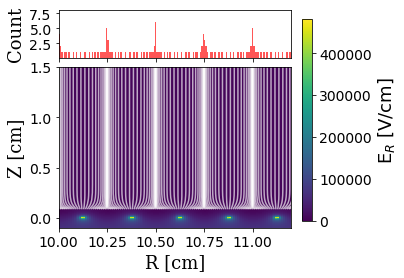

In [21]:
size1 = 14
size2 = 18

%pylab inline
pylab.rcParams['figure.figsize'] = (5.0, 4.0)

num_bins=200

fig = plt.figure(1)

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

img = ax_joint.pcolormesh(x_arr,y_arr,z_arr)

ax_marg_x.hist(r_hist_list, bins=num_bins, alpha=0.66, color='red', label='Final radial position of drift lines')
#ax_marg_x.plot(phot_keV_list, phot_Intensity_list, 'xr')
#ax_marg_x.set_yscale('log')
ax_marg_x.set_xlim(10, 11.2)
ax_marg_x.set_ylim(.1,8)
ax_joint.set_xlim(10,11.2)
ax_joint.set_ylim(-.1,1.5)

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('Joint x label')
ax_joint.set_ylabel('Joint y label')


ax_joint.set_ylabel('Z [cm]',fontsize=18,family='serif')
ax_joint.set_xlabel('R [cm]',fontsize=18,family='serif')
ax_joint.tick_params(axis='both', which='major', labelsize=14)
ax_joint.tick_params(axis='both', which='major', labelsize=14)

for file in filelist:
    inpath=folder+str(file) 
    rIN_cm = []
    zIN_cm = []
    DT_IN_us = []
    rOUT_cm = []
    zOUT_cm = []   
    for line in open(inpath):
        #print file
        if line.startswith('#'):
            continue
        if line.startswith('*'):
            continue
        else:
            data = line.split('		')
            #print data[0]
            rIN_cm.append(float(data[0]))
            zIN_cm.append(float(data[1]))
            DT_IN_us.append(float(data[2]))
            rOUT_cm.append(float(data[3]))
            zOUT_cm.append(float(data[4]))
    
    r_cm_array = np.asarray(rOUT_cm)
    z_cm_array = np.asarray(zOUT_cm)

    
    if i==0:
        ax_joint.plot(r_cm_array, z_cm_array, '-w', alpha=.66,label='Drift lines')
    #elif i==5:
    #    print file_list[i]
    #    plt.plot(r_cm_array, z_cm_array, '-r')
    else:
        ax_joint.plot(r_cm_array, z_cm_array, '-w', alpha=.66)


# Set labels on marginals
#ax_marg_y.set_xlabel('Marginal x label')
#ax_marg_y.set_xlabel('Probability',fontsize=18,family='serif')
ax_marg_x.set_ylabel('Count',fontsize=18,family='serif')

ax_marg_x.tick_params(axis='both', which='major', labelsize=14)
#ax_marg_y.tick_params(axis='both', which='major', labelsize=14)
##ax_marg_x.set_xticks(fontsize=14)
##plt.ylabel('Probability',fontsize=18,family='serif')

#fig.colorbar(img)

fig.subplots_adjust(right=1.0)
cbar_ax = fig.add_axes([0.8, 0.15, 0.03, 0.7])
cbar=fig.colorbar(img, cax=cbar_ax)

#cbar = ax_joint.colorbar()                                                                  
#cbar.ax.tick_params(labelsize=12)  

cbar.set_label('E$_{R}$ [V/cm]', size=size2)#
cbar.ax.tick_params(labelsize=size1)